# Phân tích khám phá dữ liệu (EDA) - Data Silver


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import os

# Cấu hình hiển thị
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Đọc dữ liệu từ thư mục silver

In [2]:
# Đường dẫn đến file dữ liệu
silver_dir = Path('../data/silver')
json_file = silver_dir / 'data_vbpl_boyte_full_details_jupyter.json'

# Kiểm tra xem file có tồn tại không
if not json_file.exists():
    print(f"File không tồn tại: {json_file}")
    # Thử file thay thế
    json_file = silver_dir / 'data_vbpl_boyte_full_details.json'
    if not json_file.exists():
        print(f"File không tồn tại: {json_file}")
        raise FileNotFoundError("Không tìm thấy file JSON nào trong thư mục silver")

print(f"Đọc dữ liệu từ: {json_file}")

Đọc dữ liệu từ: ..\data\silver\data_vbpl_boyte_full_details_jupyter.json


In [3]:
# Đọc file JSON
try:
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Chuyển đổi thành DataFrame
    if isinstance(data, list):
        df = pd.DataFrame(data)
    else:
        # Nếu dữ liệu ở dạng dict, có thể cần điều chỉnh tùy theo cấu trúc
        df = pd.DataFrame([data])
    
    print(f"Đã đọc dữ liệu thành công với {len(df)} bản ghi.")
except Exception as e:
    print(f"Lỗi khi đọc file JSON: {e}")
    # Thử đọc từng dòng một nếu file quá lớn hoặc không đúng định dạng
    try:
        data_list = []
        with open(json_file, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data_list.append(json.loads(line))
                except:
                    continue
        df = pd.DataFrame(data_list)
        print(f"Đã đọc dữ liệu theo từng dòng với {len(df)} bản ghi.")
    except Exception as e2:
        print(f"Lỗi khi đọc file JSON theo từng dòng: {e2}")

Đã đọc dữ liệu thành công với 614 bản ghi.


## Thông tin cơ bản về dữ liệu

In [4]:
# Hiển thị kích thước dữ liệu
print(f"Kích thước DataFrame: {df.shape}")

# Hiển thị 5 bản ghi đầu tiên
df.head()

Kích thước DataFrame: (614, 7)


,TenVanBan,DuongLink,NgayHieuLuc,Trang,NoiDung,LinhVuc,LoaiVanBan_ThuocTinh
0,Thông tư Thông tư 08/2025/TT-BYT,https://vbpl.vn/boyte/Pages/vbpq-toanvan.aspx?...,07/03/2025,1,BỘ Y TẾ\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VI...,An toàn thực phẩm,Thông tư
1,Thông tư Thông tư 04/2025/TT-BYT,https://vbpl.vn/boyte/Pages/vbpq-toanvan.aspx?...,04/03/2025,1,BỘ Y TẾ\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VI...,Y tế dự phòng,Thông tư
2,Thông tư Thông tư 05/2025/TT-BYT,https://vbpl.vn/boyte/Pages/vbpq-toanvan.aspx?...,04/03/2025,1,BỘ Y TẾ\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VI...,Y tế dự phòng,Thông tư
3,Thông tư Thông tư 07/2025/TT-BYT,https://vbpl.vn/boyte/Pages/vbpq-toanvan.aspx?...,04/03/2025,1,BỘ Y TẾ\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VI...,Y tế dự phòng,Thông tư
4,Thông tư Thông tư 06/2025/TT-BYT,https://vbpl.vn/boyte/Pages/vbpq-toanvan.aspx?...,04/03/2025,1,BỘ Y TẾ\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VI...,Y tế dự phòng,Thông tư


In [5]:
# Thông tin về các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TenVanBan             614 non-null    object
 1   DuongLink             614 non-null    object
 2   NgayHieuLuc           614 non-null    object
 3   Trang                 614 non-null    int64 
 4   NoiDung               612 non-null    object
 5   LinhVuc               540 non-null    object
 6   LoaiVanBan_ThuocTinh  540 non-null    object
dtypes: int64(1), object(6)
memory usage: 33.7+ KB


## Kiểm tra dữ liệu thiếu

In [6]:
# Kiểm tra giá trị null/NA
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Số lượng giá trị thiếu': missing_data,
    'Phần trăm': missing_percentage
})

missing_info[missing_info['Số lượng giá trị thiếu'] > 0].sort_values('Phần trăm', ascending=False)

,Số lượng giá trị thiếu,Phần trăm
LinhVuc,74,12.052117
LoaiVanBan_ThuocTinh,74,12.052117
NoiDung,2,0.325733


## Phân tích cụ thể các trường dữ liệu

In [7]:
# Danh sách các cột
print("Các cột trong dữ liệu:")
for col in df.columns:
    print(f"- {col}")

Các cột trong dữ liệu:
- TenVanBan
- DuongLink
- NgayHieuLuc
- Trang
- NoiDung
- LinhVuc
- LoaiVanBan_ThuocTinh


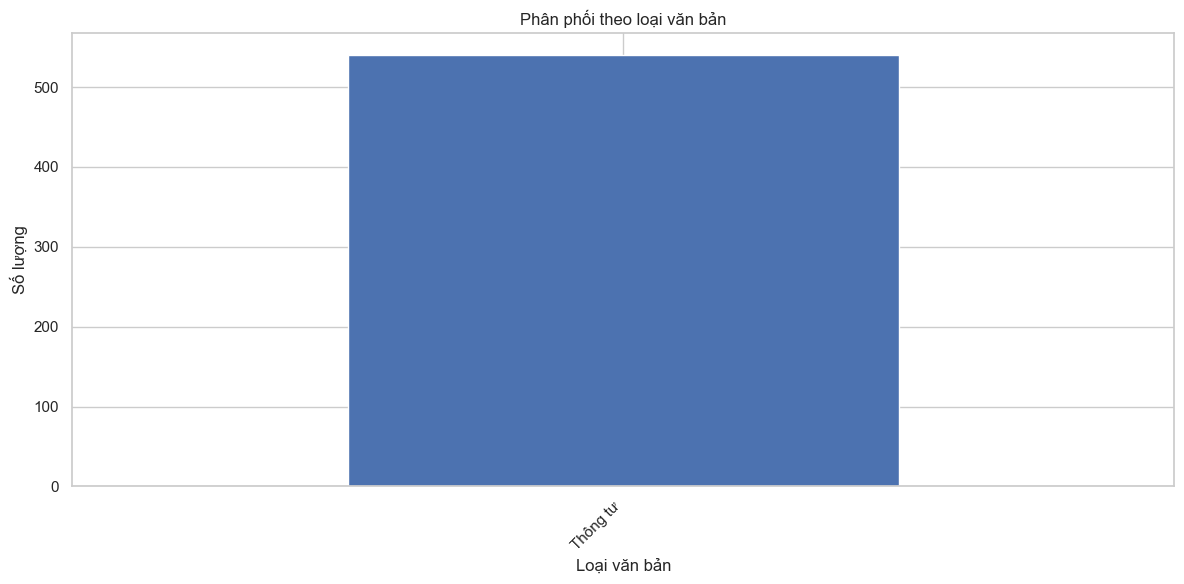

In [12]:

if 'LoaiVanBan_ThuocTinh' in df.columns:
    plt.figure(figsize=(12, 6))
    df['LoaiVanBan_ThuocTinh'].value_counts().plot(kind='bar')
    plt.title('Phân phối theo loại văn bản')
    plt.xlabel('Loại văn bản')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

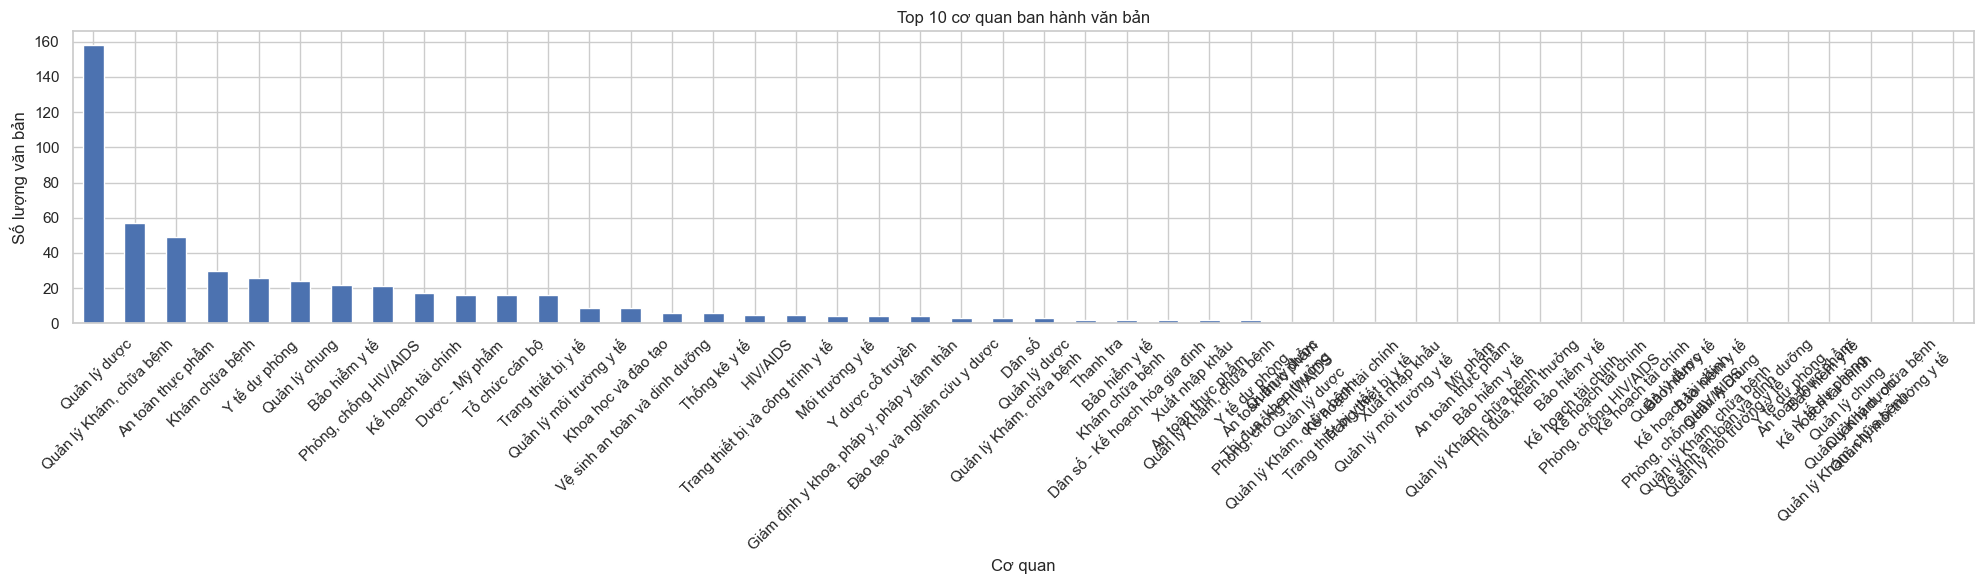

In [15]:
# Phân tích cơ quan ban hành (nếu có)
if 'LinhVuc' in df.columns:
    top_agencies = df['LinhVuc'].value_counts()
    plt.figure(figsize=(20, 6))
    top_agencies.plot(kind='bar')
    plt.title('Top 10 cơ quan ban hành văn bản')
    plt.xlabel('Cơ quan')
    plt.ylabel('Số lượng văn bản')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()